In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data Standardization

We have some source data as a vector of real values $x = (x_0, x_2,\dots, x_{n-1}) \in \mathbb{R}^n$. Standardization of $X$ is a transformation of $x$ into a vector $y$ using a function $f: \mathbb{R}^n \to \mathbb{R}^n$ so that $y = f(x)$. The transformation should map the data into a suitable range while preserving relations between the elements.  E.g., if $f(x) = (y_0, y_1,\ldots,y_{n-1})$ and if $x_i \ge x_j$, for some integers $i$, $j$ between $0$ and $n-1$, then it should hold $y_i \ge y_j$. In the literature, standardization is also denoted as scaling or normalization. The terminology is not fixed. We will use the notions from the lecture.

## Range standardization to an interval $\langle A,B \rangle$ of a list and a numpy array

Implement a function `range_standardize_list(x, A=0, B=1)` that maps an arbitrary input vector `x`, represented as a **list** of floats, linearly onto the interval $\langle A, B \rangle$. Usually, we use range standardization onto the interval $\langle 0, 1 \rangle$ or $\langle -1, 1 \rangle$. For example

    >>> range_standardize_list([0.12, 3, -123],-1,1)
    [0.9542857142857144, 1.0, -1.0]
    
    >>> range_standardize_list([0.12, 3, -123],0,1)
    [0.9771428571428572, 1.0, 0.0]

In [7]:
def range_standardize_list(x:list, A:float=0, B:float=1):
    # x is a list of floats
    # returns a list with values mapped linearly into the interval <A,B>
    max = np.max(x)
    min = np.min(x)
    result = []
    for i in x:
        result.append( (i-min)/(max-min)*(B-A)+A )
    return result
    
print(range_standardize_list([0.12, 3, -123],-1,1))
print(range_standardize_list([-5,-2,-1,0,10],0,1))
assert(np.allclose(range_standardize_list([-5,-2,-1,0,10],0,1), [0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]))

[0.9542857142857144, 1.0, -1.0]
[0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]


In [8]:
def range_standardize_list(x:list, A:float=0, B:float=1):
    # x is a list of floats
    # returns a list with values mapped linearly into the interval <A,B>
    MIN = min(x)
    MAX = max(x)
    copyX = x.copy()
    if (MIN == MAX):
        copyX = [(A + B)/2] * len(x)
        return copyX
    for i in range (len(x)):
        copyX[i] = (x[i] - MIN) / (MAX - MIN) * (B - A) + A # we normalize at first and then we scale
    return copyX

    
print(range_standardize_list([0.12, 3, -123],-1,1))
print(range_standardize_list([-5,-2,-1,0,10],0,1))
print(range_standardize_list([2, 2, 2],0,1))
assert(np.allclose(range_standardize_list([-5,-2,-1,0,10],0,1), [0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]))

[0.9542857142857144, 1.0, -1.0]
[0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]
[0.5, 0.5, 0.5]


Using `matplotlib`, depict in a single plot `x` and `range_standardize_list(x,A,B)` –- e.g., with `x` on the horizontal axis and `range_standardize_list(x,A,B)` on the vertical axis.

In [11]:
print(range_standardize_list([3, 3, 3],-1,1))

[0.0, 0.0, 0.0]


x: [-5, -2, -1, 0, 10]
normalized_x: [0.0, 0.2, 0.26666666666666666, 0.3333333333333333, 1.0]


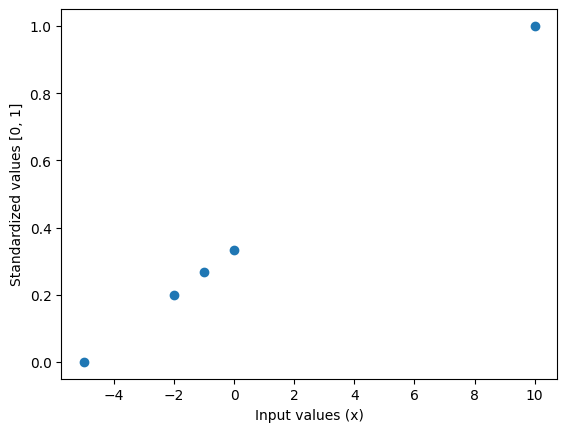

In [14]:
import matplotlib.pyplot as plt

A = 0
B = 1
x = [-5,-2,-1,0,10]
normalized_x = range_standardize_list(x,A,B)

plt.scatter(x, normalized_x)
plt.xlabel("Input values (x)")
plt.ylabel(f"Standardized values [{A}, {B}]")
print(f"x: {x}")
print(f"normalized_x: {normalized_x}")

Implement another version of min-max standardization, `range_standardize`, that accepts input data represented as a **two-dimensional numpy array**. Each row of the two-dimensional input array `X` is one observation. A column of `X` is the value of an attribute for all observations. Therefore, the normalization is performed **column-wise**.

In [17]:
X = np.array([[0.12, 2, 1.5, 1], [3, 5, 1.4, 1], [-123, 7, -1.8, 1], [45, 0, 1, 1]])
print(X)

[[ 1.20e-01  2.00e+00  1.50e+00  1.00e+00]
 [ 3.00e+00  5.00e+00  1.40e+00  1.00e+00]
 [-1.23e+02  7.00e+00 -1.80e+00  1.00e+00]
 [ 4.50e+01  0.00e+00  1.00e+00  1.00e+00]]


In [18]:
def range_standardize(X, A=0, B=1):
    # X is a two-dimensional numpy array of floats
    # returns a numpy array with values from X mapped linearly into the interval <A,B>
    # Fill NaN values with 0
    X = np.nan_to_num(X)
    mi = X.min(axis=0)
    mx = X.max(axis=0)
    rng = mx - mi
    newX = (A + (X - mi) * (B - A) / rng)
    newX[:,rng == 0] = (B-A)/2
    return newX
   

range_standardize(X, 0, 10)

/tmp/ipykernel_44/3804343826.py:9: RuntimeWarning: invalid value encountered in divide
  newX = (A + (X - mi) * (B - A) / rng)


array([[ 7.32857143,  2.85714286, 10.        ,  5.        ],
       [ 7.5       ,  7.14285714,  9.6969697 ,  5.        ],
       [ 0.        , 10.        ,  0.        ,  5.        ],
       [10.        ,  0.        ,  8.48484848,  5.        ]])

Are there special cases that should be considered when implementing/using the above functions?

What should be the output of the following statement?

In [21]:
range_standardize(np.ones((3,1)), 0, 5)

/tmp/ipykernel_44/3804343826.py:9: RuntimeWarning: invalid value encountered in divide
  newX = (A + (X - mi) * (B - A) / rng)


array([[2.5],
       [2.5],
       [2.5]])

Make sure that the previous statement runs correctly.

### Class `RangeStandardizer`
However, we also must be able 
1. to apply the same transformation to new data and
2. to compute the inverse transformation. 
Implement another version of `range_standardizer` as a class `RangeStandardizer` that can not only compute the range standardization but stores also the parameters of the transformation. This enables the application of the same standardization to new data or the computation of the inverse transformation.

Such class should implement the following methods:
* `fit_transform(self, X)`: fit standardization to data `X`;
* `apply(self, X)`: apply standardization to data X using parameters 
  of the transformation stored in the object;
* `inverse(self, X)`: apply the inverse transformation (inverse to the standardization) to data `X` 
  using parameters of the transformation stored in the object.

Let us define an **abstract** class `Standardizer` which will serve as the base class for any Standardizer class.

In [30]:
class Standardizer:
    """A base class for normalization"""
    
    def fit_transform(self, X):
        """Fit standardizer to data X;
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        raise NotImplementedError
                                
    def apply(self, X):
        """Apply normalization to data X using parameters 
        of the transformation stored in the object.
        """
        raise NotImplementedError
                        
    def inverse(self, X):
        """Apply the inverse transformation of the normalization to data X 
        using parameters of the transformation stored in the object.
        """
        raise NotImplementedError

Now we can define a class `range_standardizer` that will implement min-max normalization.

In [39]:
class RangeStandardizer(Standardizer):
    """A class for range normalization"""
    
    min = None
    max = None
    def __init__(self, A=0, B=1):
        """Constructor for range standardizer into the interval <A,B>"""
        self.A = A
        self.B = B
        
    def fit_transform(self, X):
        """Fit range standardizer to data X, constant features (columns) 
        are mapped into the middle of the interval <A,B>;
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        # YOUR CODE HERE
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)

        self.min, self.max = np.where(np.isclose(self.min, self.max), np.zeros(self.min.shape), self.min), \
                             np.where(np.isclose(self.min, self.max), self.max * 2, self.max)

        X = np.array(X)
        X = X - self.min
        X = X / (self.max - self.min)
        X = X * (self.B - self.A)
        X = X + self.A
        
        return X
    
                                
    def apply(self, X):
        """Apply range standardization to data X using parameters 
        of the transformation stored in the object.
        """
        # YOUR CODE HERE

        X = np.asarray(X)
        X = X - self.min
        X = X / (self.max - self.min) 
        X = X * (self.B - self.A)
        X = X + self.A
        
        return X
    
                        
    def inverse(self, X):
        """Apply the inverse transformation of range standardization to data X 
        using parameters of the transformation stored in the object.
        """
        # YOUR CODE HERE
        
        X = np.asarray(X)
        X = X - self.A
        X = X / (self.B - self.A)
        X = X * (self.max - self.min)
        X = X + self.min
        return X

In [48]:
print(X)
mmn = RangeStandardizer(0,10)
X_norm = mmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[7.32857143,2.85714286,10, 5],[7.5,7.14285714,9.6969697, 5],
                                     [0,10, 0, 5],[10,0,8.48484848, 5]])))
print(mmn.inverse(X_norm))
assert(np.allclose(mmn.inverse(X_norm), X))

[[ 1.20e-01  2.00e+00  1.50e+00  1.00e+00]
 [ 3.00e+00  5.00e+00  1.40e+00  1.00e+00]
 [-1.23e+02  7.00e+00 -1.80e+00  1.00e+00]
 [ 4.50e+01  0.00e+00  1.00e+00  1.00e+00]]
[[ 7.32857143  2.85714286 10.          5.        ]
 [ 7.5         7.14285714  9.6969697   5.        ]
 [ 0.         10.          0.          5.        ]
 [10.          0.          8.48484848  5.        ]]
[[ 1.20e-01  2.00e+00  1.50e+00  1.00e+00]
 [ 3.00e+00  5.00e+00  1.40e+00  1.00e+00]
 [-1.23e+02  7.00e+00 -1.80e+00  1.00e+00]
 [ 4.50e+01  0.00e+00  1.00e+00  1.00e+00]]


In [51]:
X = np.hstack((np.ones((3,1)), 3 * np.ones((3,1)), np.arange(3).reshape((3, 1))))
print(X)
mmn = RangeStandardizer(0, 10)
X_standardized = mmn.fit_transform(X)
print(X_standardized)
assert(np.allclose(X_standardized, np.array([[5, 5, 0], [5, 5, 5], [5, 5, 10]])))
print(mmn.inverse(X_standardized))
assert(np.allclose(mmn.inverse(X_standardized), X))

[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
[[ 5.  5.  0.]
 [ 5.  5.  5.]
 [ 5.  5. 10.]]
[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]


## Standardization according to standard deviation


*Population standard deviation* measures the spread of a data distribution. It measures the typical distance between each data point and the mean. The *sample standard deviation* is an unbiased estimate of the population standard deviation. The sample standard deviation is defined as
$$sd(X)= \sigma_X=\sqrt{\frac{\sum(X-\bar{X})^2}{N-1}},$$
where $\bar{X}=\frac{1}{N} \cdot \sum_{i=1}^{N} x_i$ is the mean value of $X$.

Standardization according to standard deviation transforms an input vector linearly so that the mapped data will have a mean of 0 and the (sample) standard deviation of 1. This transformation is sometimes called *normalization*.

Implement the methods of the following class, `SdStandardizer`, which should implement standardization according to standard deviation. Its method `fit_transform(X)` linearly transforms the two-dimensional array `X` into an array with the mean 0 and the (sample) standard deviation 1 in each column.

In [63]:
class SdStandardizer(Standardizer):
    """A class for standardization according to standard deviation"""

    def __init__(self):
        self.means = None
        self.sds = None

    def fit_transform(self, X):
        """Fit SdStandardizer to data X, constant features (columns) 
        are mapped into 0 (not satisfying the requirements that 
        the standard deviation is 1);
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        self.means = X.mean(axis=0)
        self.sds = X.std(axis=0, ddof=1)

        return self.apply(X)
    
                                
    def apply(self, X):
        """apply the standardization according to standard deviation to data X using parameters 
        of the transformation stored in the object
        """
        if self.means is None or self.sds is None:
            raise ValueError("Do fit transform before apply")

        res = (X - self.means) / self.sds
        mask = self.sds == 0
        return np.where(mask, 0, res)

    
                        
    def inverse(self, X):
        """apply the transformation inverse to standardization according to standard deviation to data X 
        using parameters of the transformation stored in the object
        """
        return X * self.sds + self.means

In [72]:
X = np.array([[0.12, 7], [3, 7], [-123, 7]])
print(X)
sdn = SdStandardizer()
X_standardized = sdn.fit_transform(X)
print(X_standardized)
print(X_standardized.std(ddof=1, axis=0))
assert(np.allclose(X_standardized.std(ddof=1, axis=0), 1))
print(sdn.inverse(X_standardized))
assert(np.allclose(sdn.inverse(X_standardized), X))

[[ 1.20e-01  7.00e+00]
 [ 3.00e+00  7.00e+00]
 [-1.23e+02  7.00e+00]]
[[ 0.55721486  0.        ]
 [ 0.59725426  0.        ]
 [-1.15446912  0.        ]]
[1. 0.]
/tmp/ipykernel_44/2064528708.py:28: RuntimeWarning: invalid value encountered in divide
  res = (X - self.means) / self.sds


AssertionError: 

In [69]:
X = np.hstack((np.ones((3,1)), 3*np.ones((3,1)),np.arange(3).reshape((3,1))))
print(X)
sdn = SdStandardizer()
X_standardized = sdn.fit_transform(X)
print(X_standardized)
assert(np.allclose(X_standardized.std(ddof=1, axis=0), np.array([0, 0, 1])))
print(sdn.inverse(X_standardized))
assert(np.allclose(sdn.inverse(X_standardized), X))

[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
[[1. 3. 0.]
 [1. 3. 1.]
 [1. 3. 2.]]
/tmp/ipykernel_44/2064528708.py:28: RuntimeWarning: invalid value encountered in divide
  res = (X - self.means) / self.sds


## Decimal scaling

Decimal scaling mapes the values in the range $[-1, 1]$ by dividing all values with $10^k$, where $k$ is the smallest integer such that all mapped values are in the interval $[-1,1]$. Implement class `DecScStandardizer` that implements the corresponding methods. 


In [ ]:
class DecScStandardizer(Standardizer):
    """A class for standardization using decimal scaling"""
            

    def fit_transform(self, X):
        """Fit DecScStandardizer to data X
        the method returns transformed data, 
        and saves parameters of the transformation in internal attributes.
        """
        # YOUR CODE HERE
        raise NotImplementedError()
    
                                
    def apply(self, X):
        """apply the standardization with decimal scaling to data X using parameters 
        of the transformation stored in the object
        """
        # YOUR CODE HERE
        raise NotImplementedError()
    
                        
    def inverse(self, X):
        """apply the transformation inverse to standardization with decimal scaling to data X 
        using parameters of the transformation stored in the object
        """
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
X = np.array([[0.12, 2], [3, 5], [-123, 7]])
print(X)
dss = DecScStandardizer()
X_standardized = dss.fit_transform(X)
print(X_standardized)
print(dss.inverse(X_standardized))
assert(np.allclose(dss.inverse(X_standardized), X))

## Sigmoid standardization

The sigmoid function (or logistic function) is the real function
$$\sigma(x,\lambda)=\frac{1}{1+e^{-\lambda x}},$$ where the real constant $\lambda$ is called *slope*.
The domain of sigmoid is $(-\infty,+\infty)$ and its range is  $(0,1)$.

We can plot the sigmoid function for $\lambda=1$, e.g., in the following way:

In [ ]:
x = np.arange(-10,10,0.2)
y = 1 / (1 + np.exp(-x))
plt.figure(figsize=(4,1))
plt.plot(x,y)
plt.title('Sigmoid function with slope 1')

Implement the methods of the following class `SigmStandardizer` that should implement sigmoid normalization. Its method `fit_transform(X)` transforms two-dimensional array `X` non-linearly using function $\sigma(x,\lambda)$.

In [ ]:
class SigmStandardizer(Standardizer):
    """A class for sigmoid standardization"""
    
    def __init__(self, lamda=1):
        """constructor for sigmoid standardizer"""
        self.lamda = lamda
            
    def fit_transform(self, X):
        """Fit SigmStandardizer to data X;
        the method returns transformed data.
        """  
        # YOUR CODE HERE
        raise NotImplementedError()
    
                                
    def apply(self, X):
        """Apply standardization according to standard deviation to data X using parameters 
        of the transformation stored in the object.
        """
        # YOUR CODE HERE
        raise NotImplementedError()
    
                        
    def inverse(self, X):
        """Apply the inverse transformation to the standardization according to standard deviation 
        to data X using parameters of the transformation stored in the object.
        """
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
X = np.array([[0.12, 2], [3, 5], [-123, 7]])
print(X)
sigmn = SigmStandardizer(lamda=2)
X_norm = sigmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[0.559713649, 0.982013790], [0.997527377, 0.999954602], [0, 0.999999168]])))
print(sigmn.inverse(X_norm))
assert(np.allclose(sigmn.inverse(X_norm), X))

In [ ]:
X = np.hstack((np.ones((3,1)), 3*np.ones((3,1)),np.arange(3).reshape((3,1))))
print(X)
sigmn = SigmStandardizer()
X_norm = sigmn.fit_transform(X)
print(X_norm)
assert(np.allclose(X_norm, np.array([[0.73105858, 0.95257413, 0.5],
                                     [0.73105858, 0.95257413, 0.73105858],
                                     [0.73105858, 0.95257413, 0.88079708]])))
print(sigmn.inverse(X_norm))
assert(np.allclose(sigmn.inverse(X_norm), X))

Are there functions implementing the above normalization method in `numpy` or `scikit-learn` libraries?

In [ ]:
import sklearn

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()